<font size='6'> Burgers' Equation </font>

In this Project, we are supposed to implement the Lax-Wandroff method to solve the Burgers' equation using second-order differences for the time derivative and burgers' equation itself to relate derivatives

0.008
12


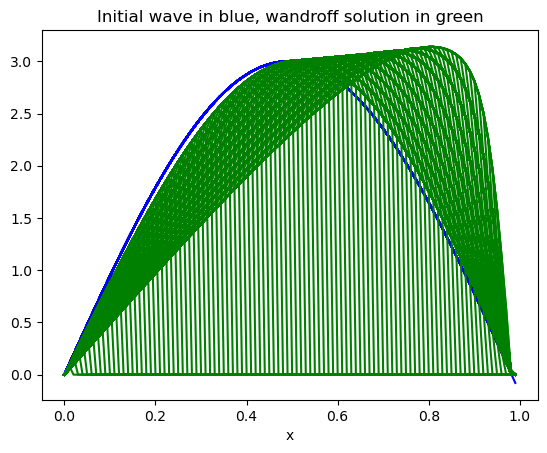

In [65]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import math
import random

#declaration of initial variables

N = 100 # the size of the array
c = 1 # the advection speed
dx = 1./N # the grid spacing 
beta = 0.8
dt = beta*dx/c # this formula is derived from (beta = c*dt/dx)
print(dt)
T_final = 0.1 #this is the total simulation time
n = int(T_final/dt) #this is the number of time steps to reach the simulation time T_final
print(n)

#defining the arrays for the initial data and solution

u0 = [] # this is to store the initial array 
x_new = [] # this is for the spatial grid points
u = np.zeros((N+1), float) # this will be used for storing the solution data
plt.figure(0) # this just sets up a new plot

#plotting the initial solution

def plotinitsol():
    for i in range (0, N):
       x = i * dx
       x_new.append(x)
       
       #implementation of sinusodial wave using given parameters
       u0.append(3*(np.sin(3.2*(x))))
       plt.plot(x_new, u0, 'b')
       
plotinitsol()

# Lax Wandroff Implementation

def wandroff():
    for j in range(0, n): # loop for time
        for i in range (0, N-2): #loop for x
            
            #Equation for Lax-Wandroff method
            u[i+1] = u0[i+1] - ((beta/4)*(((u0[i+2])**2)-((u0[i])**2))) + (beta**2/8)*(u0[i+2] - u0[i+1])*(((u0[i+2])**2)-((u0[i])**2)) - (beta**2/8)*(u0[i+1] - u0[i])*(((u0[i+1])**2)-((u0[i])**2))
            
            #Boundary conditions
            u[0] = 0
            u[N-1] = 0
            u0[i] = u[i]
            plt.plot(x_new, u[:-1], 'g') # this will take all the points in the x axis and also all elements are plotted except the last one
            # the g is just the color green
            
wandroff()

#plotting the results

plt.title('Initial wave in blue, wandroff solution in green')
plt.xlabel('x')
plt.show()

- when testing with different values of beta, the stability constant is true for beta < 1, this can be shown in the pictures of the pdf file which is together with this notebook, that the wandroff solution deviates from the initial solution as beta increases, and when beta is too high, then no solution can be seen.